In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('ebay_mens_perfume.csv')
df2 = pd.read_csv('ebay_womens_perfume.csv')

In [3]:
# Combine the datasets
df1['Gender'] = 'male'
df2['Gender'] = 'female'

perfume_analysis_db= pd.concat([df1, df2], ignore_index=True)

In [4]:
perfume_analysis_db.head()

brand                                              title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              type   price priceWithCurrency  available  \
0    Eau de Parfum   84.99      US $84.99/ea       10.0   
1    Eau de Parfum  109.99        US $109.99        8.0   
2  Eau de Toilette  100.00        US $100.00       10.0   
3  Eau de Toilette   44.99      US $44.99/ea        2.0   
4       Fragrances   16.91         US $16.91        NaN   

                           availableText   sold                lastUpdated  \
0      More than 10 available / 116 sold  116.0  May 24, 2024 10:03:04 PDT   
1                  8 available / 48 sold   48.0  May 23, 2024 23:07:49 PDT   
2       More than 10 available / 27 sold   27.0  May 22, 2024 21:55:43 PDT   
3                 2 available / 159 sold  159.0  May 24, 2024 03:30:43 PDT   
4  Limited quantity available / 156 sold  156.0  May 24, 2024 07:56:25 PDT   

                             itemLocation Gender  
0     Allen Park, Michigan, United States   male  
1                Atlanta, Georgia, Canada   male  
2       Dearborn, Michigan, United States   male  
3  Reinholds, Pennsylvania, United States   male  
4       Brooklyn, New York, United States   male

In [5]:
perfume_analysis_db.tail()

brand                                              title  \
1995                Avon  Avon Far Away Infinity Eau de Parfum 1.7 fl. o...   
1996             Mancera  Roses Greedy by Mancera perfume for unisex EDP...   
1997           Unbranded  Sweet Tooth Eau de Parfum, Perfume for Women, ...   
1998  Juliette Has A Gun  MMMM BY Juliette Has A Gun perfume for her EDP...   
1999        Paris Hilton  PARIS HILTON ELECTRIFY for Women Cologne 3.4 o...   

                type  price priceWithCurrency  available  \
1995   Eau de Parfum  13.89         US $13.89       10.0   
1996   Eau de Parfum  57.85      US $57.85/ea       33.0   
1997               1  30.96         US $30.96        2.0   
1998  Eau de Perfume  53.99      US $53.99/ea        3.0   
1999   Eau de Parfum  14.99      US $14.99/ea        4.0   

                          availableText   sold                lastUpdated  \
1995  More than 10 available / 157 sold  157.0  May 16, 2024 22:35:29 PDT   
1996             33 available / 58 sold   58.0  May 24, 2024 08:03:11 PDT   
1997               2 available / 3 sold    3.0  May 17, 2024 23:16:41 PDT   
1998             3 available / 117 sold  117.0  May 13, 2024 22:19:34 PDT   
1999              4 available / 51 sold   51.0  May 22, 2024 05:44:45 PDT   

                                 itemLocation  Gender  
1995  West Palm Beach, Florida, United States  female  
1996             Dallas, Texas, United States  female  
1997        New York, New York, United States  female  
1998             Dallas, Texas, United States  female  
1999                        TX, United States  female

In [6]:
perfume_analysis_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1998 non-null   object 
 1   title              2000 non-null   object 
 2   type               1995 non-null   object 
 3   price              2000 non-null   float64
 4   priceWithCurrency  2000 non-null   object 
 5   available          1758 non-null   float64
 6   availableText      1989 non-null   object 
 7   sold               1978 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       2000 non-null   object 
 10  Gender             2000 non-null   object 
dtypes: float64(3), object(8)
memory usage: 172.0+ KB


In [7]:
# Get summary statistics
perfume_analysis_db.describe()

price    available          sold
count  2000.000000  1758.000000   1978.000000
mean     43.187090    20.728669    632.473711
std      32.619625    56.781389   2470.055822
min       1.990000     2.000000      1.000000
25%      21.972500     5.000000     14.000000
50%      34.040000    10.000000     51.000000
75%      53.990000    10.000000    285.750000
max     299.990000   842.000000  54052.000000

In [8]:
df2.describe()

price   available          sold
count  1000.000000  869.000000    984.000000
mean     39.892980   21.426928    497.321138
std      29.072186   51.476703   1372.510561
min       1.990000    2.000000      1.000000
25%      20.700000    6.000000     15.000000
50%      32.990000   10.000000     52.000000
75%      49.990000   10.000000    263.750000
max     299.990000  557.000000  17854.000000

In [9]:
# Get summary statistics
perfume_analysis_db.describe(include = 'all')

brand                                              title  \
count             1998                                               2000   
unique             401                                               1941   
top     Giorgio Armani  YSL Yves Saint Laurent Y Eau de Perfume Spray ...   
freq                72                                                  4   
mean               NaN                                                NaN   
std                NaN                                                NaN   
min                NaN                                                NaN   
25%                NaN                                                NaN   
50%                NaN                                                NaN   
75%                NaN                                                NaN   
max                NaN                                                NaN   

                 type        price priceWithCurrency    available  \
count            1995  2000.000000              2000  1758.000000   
unique            116          NaN              1164          NaN   
top     Eau de Parfum          NaN      US $29.99/ea          NaN   
freq              847          NaN                38          NaN   
mean              NaN    43.187090               NaN    20.728669   
std               NaN    32.619625               NaN    56.781389   
min               NaN     1.990000               NaN     2.000000   
25%               NaN    21.972500               NaN     5.000000   
50%               NaN    34.040000               NaN    10.000000   
75%               NaN    53.990000               NaN    10.000000   
max               NaN   299.990000               NaN   842.000000   

                           availableText          sold  \
count                               1989   1978.000000   
unique                              1300           NaN   
top     More than 10 available / 12 sold           NaN   
freq                                  12           NaN   
mean                                 NaN    632.473711   
std                                  NaN   2470.055822   
min                                  NaN      1.000000   
25%                                  NaN     14.000000   
50%                                  NaN     51.000000   
75%                                  NaN    285.750000   
max                                  NaN  54052.000000   

                      lastUpdated                  itemLocation Gender  
count                        1874                          2000   2000  
unique                       1831                           447      2  
top     May 24, 2024 10:26:59 PDT  Dallas, Texas, United States   male  
freq                            5                           267   1000  
mean                          NaN                           NaN    NaN  
std                           NaN                           NaN    NaN  
min                           NaN                           NaN    NaN  
25%                           NaN                           NaN    NaN  
50%                           NaN                           NaN    NaN  
75%                           NaN                           NaN    NaN  
max                           NaN                           NaN    NaN

In [10]:
# Check unique values for categorical columns
perfume_analysis_db['brand'].unique()

array(['Dior', 'AS SHOW', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Multiple Brands', 'Maison Alhambra', 'Gucci', 'Ralph Lauren',
       'Dolce&Gabbana', 'SECERTMU', 'As Show', 'Versace', 'Paco Rabanne',
       'Grandeur', 'Armaf', 'Carolina Herrera', 'Dolce & Gabbana',
       'Clinique', 'Dumont', 'Afnan', 'Azzaro', "Penhaligon's", 'Bharara',
       'Valentino', 'Guy Laroche', 'Montblanc', 'Rasasi', 'Calvin Klein',
       'UOMO', 'Givenchy', 'Polo Ralph Lauren', 'C.K', 'John Varvatos',
       'Nautica', 'As Picture Show', 'Kenneth Cole', 'Tommy Hilfiger',
       '2nd To None', 'Yves Saint Laurent', 'Cologne', 'AS SHOWN', 'Roja',
       'MetaHerbal Labs', 'Mirage Brands', 'Abercrombie & Fitch',
       'Moschino', 'As Shown', '~ DOLCE & GABBANA ~', 'As picture show',
       'Superz Budapest', 'Gianni Versace', 'Christian Dior', 'HERMÈS',
       'Diesel', 'Lacoste', 'Dossier', 'Burberry', 'Michael Malul',
       'Zara', 'Aramis', 'Jean Paul Gaultier', 'Davidoff',
       'As Pictu

In [11]:
perfume_analysis_db['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Fragrances', 'Perfume', '/',
       'PARFUM', 'Parfum', 'Concentrated Uncut Pure Body Oil',
       'LE PARFUM', 'Eau De Parfum', nan, 'Unscented', 'Eau de Cologne',
       '~ THE ONE EAU DE PARFUM SPRAY ~', 'EXTRAIT DE PARFUM',
       'Eau De Toilette', 'Eau De Parfum Intense', 'Pheromone',
       'Aftershave', 'Fragrance & Perfume', 'Eau de Perfume',
       'Jo Malone Cologne Intense Spray', 'Y', 'Gift Sets',
       'Fragrance Rolling Ball', 'Body Spray', 'Eau de toilette',
       'Eau de Toillette',
       'Eau De Toilette, Eau De Parfum, Eau De Parfum Intense', 'Cologne',
       'le parfum', 'Eau de Toilette Intense',
       'Eau de Cologne Spray, Cologne Spray', 'Extrait De Parfum',
       'Fine Cologne', 'Does not apply', 'EDT', 'Extrait de Parfum',
       'Editions Parfums', 'DIOR HOMME COLOGNE', 'Deodorant', 'De Nuit',
       'Eau de Toilette, Cologne Spray', 'Parfum Intense',
       'Eau de Parfum Intense', 'cologne', 'EAU DE COLOGNE 

In [12]:
perfume_analysis_db['itemLocation'].unique()

array(['Allen Park, Michigan, United States', 'Atlanta, Georgia, Canada',
       'Dearborn, Michigan, United States',
       'Reinholds, Pennsylvania, United States',
       'Brooklyn, New York, United States',
       'Houston, Texas, United States',
       'Englewood Cliffs, New Jersey, United States',
       'Ithaca, New York, United States', 'shanghai, China',
       'Dearborn Heights, Michigan, United States',
       'Ecorse, Michigan, United States',
       'Warren, Michigan, United States',
       'San Francisco, California, United States',
       'Dayton,New Jersey, Hong Kong',
       'San Jose, California, United States',
       'Miami, Florida, United States',
       'Hamtramck, Michigan, United States',
       'Flat Lick, Kentucky, United States',
       'Elmhurst, New York, United States',
       'Hackensack, New Jersey, United States',
       'Dallas, Texas, United States',
       'Pomona, California, United States', 'Katy, Texas, United States',
       'College Point, New 

In [13]:
perfume_analysis_db.size

22000

In [14]:
perfume_analysis_db.shape

(2000, 11)

In [15]:
perfume_analysis_db.dtypes

brand                 object
title                 object
type                  object
price                float64
priceWithCurrency     object
available            float64
availableText         object
sold                 float64
lastUpdated           object
itemLocation          object
Gender                object
dtype: object

In [16]:
columns = perfume_analysis_db.columns
print(columns)

Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation', 'Gender'],
      dtype='object')


In [17]:
# Categorical columns
categorical_cols = [col for col in perfume_analysis_db.columns if perfume_analysis_db[col].dtype == 'object']
print("Categorical Columns:")
print(categorical_cols)

# Numerical columns
numerical_cols = [col for col in perfume_analysis_db.columns if perfume_analysis_db[col].dtype != 'object']
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['brand', 'title', 'type', 'priceWithCurrency', 'availableText', 'lastUpdated', 'itemLocation', 'Gender']

Numerical Columns:
['price', 'available', 'sold']


In [18]:
perfume_analysis_db.duplicated().sum()

1

In [19]:
# Check for missing values
perfume_analysis_db.isnull().sum()

brand                  2
title                  0
type                   5
price                  0
priceWithCurrency      0
available            242
availableText         11
sold                  22
lastUpdated          126
itemLocation           0
Gender                 0
dtype: int64

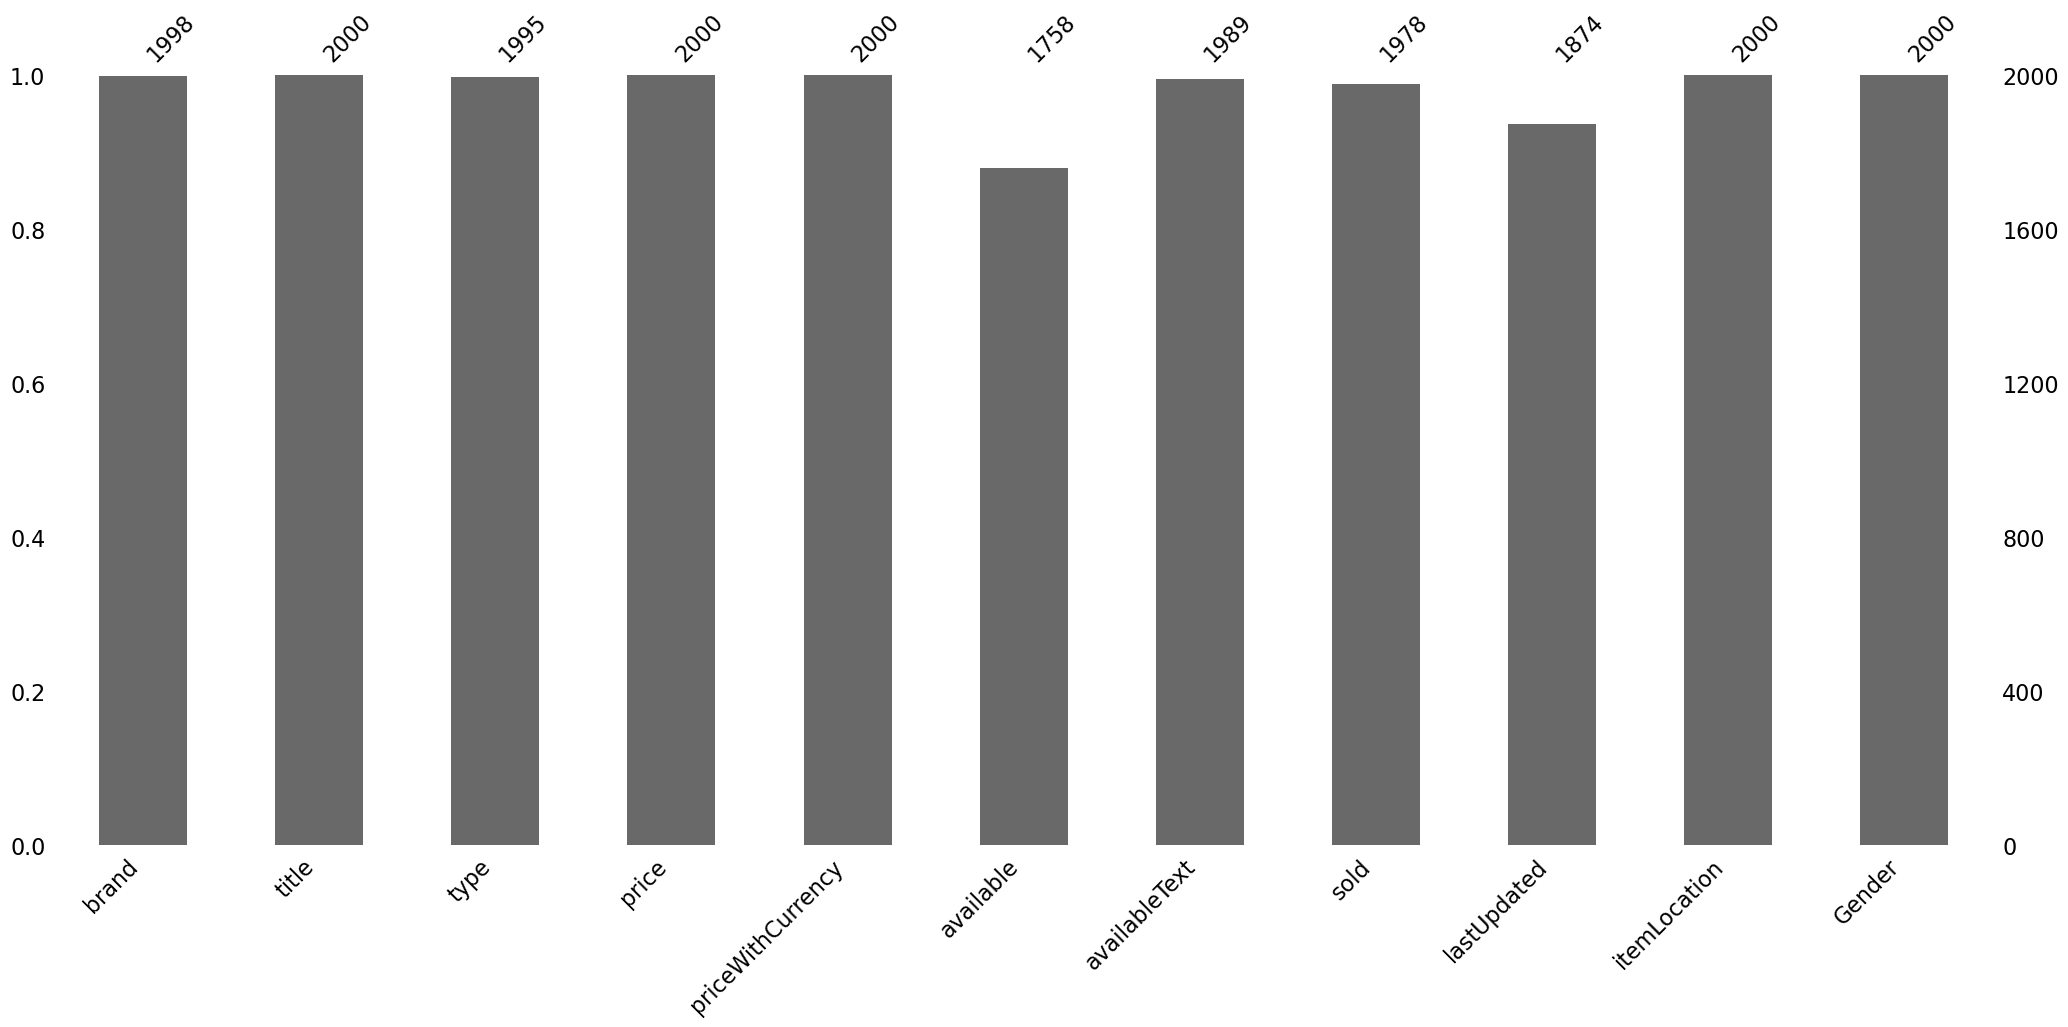

In [20]:
import missingno as msno

msno.bar(perfume_analysis_db);

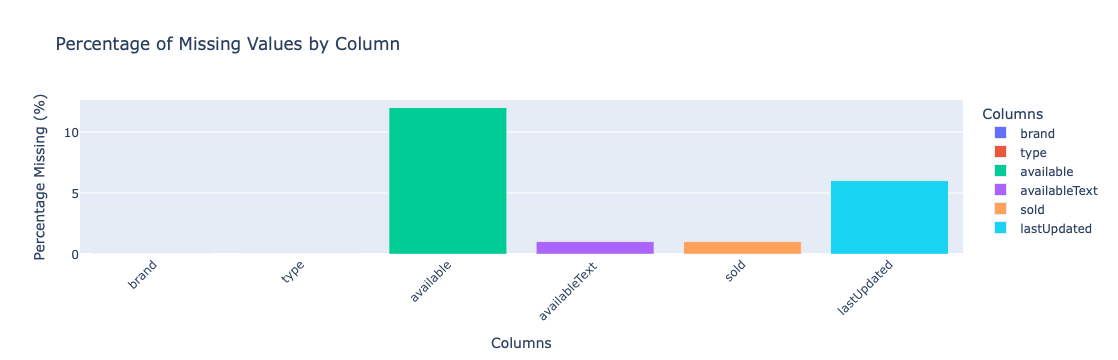

In [21]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

# Filter columns with missing values
missing_percentage = (perfume_analysis_db.isnull().sum() / len(perfume_analysis_db)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Round the percentages to whole numbers
missing_percentage = missing_percentage.round()

# Create a DataFrame for plotting
missing_perfume_analysis_db = missing_percentage.reset_index()
missing_perfume_analysis_db.columns = ['Columns', 'Percentage Missing']

# Plotting with Plotly
fig = px.bar(missing_perfume_analysis_db, x='Columns', y='Percentage Missing', color='Columns', title='Percentage of Missing Values by Column')
fig.update_layout(xaxis_title='Columns', yaxis_title='Percentage Missing (%)', xaxis_tickangle=-45)
fig.show()

# Step 1: Data Cleaning and Preparation

In [22]:
# make a copy of the data to avoid making a mess of the original data
perfume_analysis_db = perfume_analysis_db.copy()

In [23]:
perfume_analysis_db.head()

brand                                              title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              type   price priceWithCurrency  available  \
0    Eau de Parfum   84.99      US $84.99/ea       10.0   
1    Eau de Parfum  109.99        US $109.99        8.0   
2  Eau de Toilette  100.00        US $100.00       10.0   
3  Eau de Toilette   44.99      US $44.99/ea        2.0   
4       Fragrances   16.91         US $16.91        NaN   

                           availableText   sold                lastUpdated  \
0      More than 10 available / 116 sold  116.0  May 24, 2024 10:03:04 PDT   
1                  8 available / 48 sold   48.0  May 23, 2024 23:07:49 PDT   
2       More than 10 available / 27 sold   27.0  May 22, 2024 21:55:43 PDT   
3                 2 available / 159 sold  159.0  May 24, 2024 03:30:43 PDT   
4  Limited quantity available / 156 sold  156.0  May 24, 2024 07:56:25 PDT   

                             itemLocation Gender  
0     Allen Park, Michigan, United States   male  
1                Atlanta, Georgia, Canada   male  
2       Dearborn, Michigan, United States   male  
3  Reinholds, Pennsylvania, United States   male  
4       Brooklyn, New York, United States   male

In [24]:
perfume_analysis_db.tail()

brand                                              title  \
1995                Avon  Avon Far Away Infinity Eau de Parfum 1.7 fl. o...   
1996             Mancera  Roses Greedy by Mancera perfume for unisex EDP...   
1997           Unbranded  Sweet Tooth Eau de Parfum, Perfume for Women, ...   
1998  Juliette Has A Gun  MMMM BY Juliette Has A Gun perfume for her EDP...   
1999        Paris Hilton  PARIS HILTON ELECTRIFY for Women Cologne 3.4 o...   

                type  price priceWithCurrency  available  \
1995   Eau de Parfum  13.89         US $13.89       10.0   
1996   Eau de Parfum  57.85      US $57.85/ea       33.0   
1997               1  30.96         US $30.96        2.0   
1998  Eau de Perfume  53.99      US $53.99/ea        3.0   
1999   Eau de Parfum  14.99      US $14.99/ea        4.0   

                          availableText   sold                lastUpdated  \
1995  More than 10 available / 157 sold  157.0  May 16, 2024 22:35:29 PDT   
1996             33 available / 58 sold   58.0  May 24, 2024 08:03:11 PDT   
1997               2 available / 3 sold    3.0  May 17, 2024 23:16:41 PDT   
1998             3 available / 117 sold  117.0  May 13, 2024 22:19:34 PDT   
1999              4 available / 51 sold   51.0  May 22, 2024 05:44:45 PDT   

                                 itemLocation  Gender  
1995  West Palm Beach, Florida, United States  female  
1996             Dallas, Texas, United States  female  
1997        New York, New York, United States  female  
1998             Dallas, Texas, United States  female  
1999                        TX, United States  female

In [25]:
# Check for missing values
perfume_analysis_db.isnull().sum()

brand                  2
title                  0
type                   5
price                  0
priceWithCurrency      0
available            242
availableText         11
sold                  22
lastUpdated          126
itemLocation           0
Gender                 0
dtype: int64

In [26]:
perfume_analysis_db.duplicated().sum()

1

In [27]:
# Fill missing categorical values with a placeholder
perfume_analysis_db['brand'].fillna('Unbranded', inplace=True)
perfume_analysis_db['type'].fillna('Unknown', inplace=True)

In [28]:
# Fill missing numerical values with the mean
perfume_analysis_db['available'] = perfume_analysis_db['available'].fillna(perfume_analysis_db['available'].mean()).round(1)
perfume_analysis_db['sold'] = perfume_analysis_db['sold'].fillna(perfume_analysis_db['sold'].mean()).round(1)

In [29]:
# drop these columns because they  not needed for the analysis
columns = ['availableText', 'priceWithCurrency']
perfume_analysis_db.drop(columns, inplace=True, axis=1)

In [30]:
# Define a function to capitalize the first letter of each word
def capitalize_first_letter(text):
    return ' '.join(word.capitalize() for word in text.split())

# Apply the function to the column headers
perfume_analysis_db.columns = [capitalize_first_letter(col.replace('_', ' ')) for col in perfume_analysis_db.columns]

In [31]:
# Separate date and time for 'Lastupdated' column
perfume_analysis_db['Last_Updated_Date'] = pd.to_datetime(perfume_analysis_db['Lastupdated'], format='mixed', dayfirst=True).dt.date
perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'] = pd.to_datetime(perfume_analysis_db['Lastupdated'], format='mixed', dayfirst=True).dt.time

# Drop the original 'Lastupdated' column
perfume_analysis_db = perfume_analysis_db.drop('Lastupdated', axis=1)

In [32]:
# Rename column names by putting the underscore as best practice 
perfume_analysis_db = perfume_analysis_db.rename(columns={'Itemlocation': 'Item_Location'})

In [33]:
# Add the currency to price column
perfume_analysis_db = perfume_analysis_db.rename(columns={'Price': 'Price(USD)'})

In [34]:
perfume_analysis_db.head()

Brand                                              Title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              Type  Price(USD)  Available   Sold  \
0    Eau de Parfum       84.99       10.0  116.0   
1    Eau de Parfum      109.99        8.0   48.0   
2  Eau de Toilette      100.00       10.0   27.0   
3  Eau de Toilette       44.99        2.0  159.0   
4       Fragrances       16.91       20.7  156.0   

                            Item_Location Gender Last_Updated_Date  \
0     Allen Park, Michigan, United States   male        2024-05-24   
1                Atlanta, Georgia, Canada   male        2024-05-23   
2       Dearborn, Michigan, United States   male        2024-05-22   
3  Reinholds, Pennsylvania, United States   male        2024-05-24   
4       Brooklyn, New York, United States   male        2024-05-24   

  Last_Updated_Time(Pacific_Daylight_Time)  
0                                 10:03:04  
1                                 23:07:49  
2                                 21:55:43  
3                                 03:30:43  
4                                 07:56:25

In [35]:
perfume_analysis_db.tail()

Brand                                              Title  \
1995                Avon  Avon Far Away Infinity Eau de Parfum 1.7 fl. o...   
1996             Mancera  Roses Greedy by Mancera perfume for unisex EDP...   
1997           Unbranded  Sweet Tooth Eau de Parfum, Perfume for Women, ...   
1998  Juliette Has A Gun  MMMM BY Juliette Has A Gun perfume for her EDP...   
1999        Paris Hilton  PARIS HILTON ELECTRIFY for Women Cologne 3.4 o...   

                Type  Price(USD)  Available   Sold  \
1995   Eau de Parfum       13.89       10.0  157.0   
1996   Eau de Parfum       57.85       33.0   58.0   
1997               1       30.96        2.0    3.0   
1998  Eau de Perfume       53.99        3.0  117.0   
1999   Eau de Parfum       14.99        4.0   51.0   

                                Item_Location  Gender Last_Updated_Date  \
1995  West Palm Beach, Florida, United States  female        2024-05-16   
1996             Dallas, Texas, United States  female        2024-05-24   
1997        New York, New York, United States  female        2024-05-17   
1998             Dallas, Texas, United States  female        2024-05-13   
1999                        TX, United States  female        2024-05-22   

     Last_Updated_Time(Pacific_Daylight_Time)  
1995                                 22:35:29  
1996                                 08:03:11  
1997                                 23:16:41  
1998                                 22:19:34  
1999                                 05:44:45

In [36]:
# Removing Duplicates
perfume_analysis_db.drop_duplicates(inplace=True)

In [37]:
# check again for duplicates
perfume_analysis_db.duplicated().sum()

0

In [38]:
perfume_analysis_db.dtypes

Brand                                        object
Title                                        object
Type                                         object
Price(USD)                                  float64
Available                                   float64
Sold                                        float64
Item_Location                                object
Gender                                       object
Last_Updated_Date                            object
Last_Updated_Time(Pacific_Daylight_Time)     object
dtype: object

In [39]:
# Ensure available/sold are integers

perfume_analysis_db['Available'] = perfume_analysis_db['Available'].astype(int)
perfume_analysis_db['Sold'] = perfume_analysis_db['Sold'].astype(int)

In [40]:
# Convert 'Last_Updated_Date' column to datetime data type

perfume_analysis_db['Last_Updated_Date'] = pd.to_datetime(perfume_analysis_db['Last_Updated_Date'])

In [41]:
# Convert 'Last_Updated_Time(Pacific_Daylight_Time)' column to datetime data type

perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'] = pd.to_datetime(perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'], format='%H:%M:%S', errors='coerce')

In [42]:
perfume_analysis_db.dtypes

Brand                                               object
Title                                               object
Type                                                object
Price(USD)                                         float64
Available                                            int64
Sold                                                 int64
Item_Location                                       object
Gender                                              object
Last_Updated_Date                           datetime64[ns]
Last_Updated_Time(Pacific_Daylight_Time)    datetime64[ns]
dtype: object

In [43]:
perfume_analysis_db.isnull().sum()

Brand                                         0
Title                                         0
Type                                          0
Price(USD)                                    0
Available                                     0
Sold                                          0
Item_Location                                 0
Gender                                        0
Last_Updated_Date                           125
Last_Updated_Time(Pacific_Daylight_Time)    125
dtype: int64

In [44]:
# Fill with a specific value

#perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'] = perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'].fillna('00:00:00')
#perfume_analysis_db['Last_Updated_Date'] = perfume_analysis_db['Last_Updated_Date'].fillna('1970-01-01')

In [45]:
# Fill with the most recent non-missing value (forward-fill)

#perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'] = perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'].ffill()
#perfume_analysis_db['Last_Updated_Date'] = perfume_analysis_db['Last_Updated_Date'].ffill()

In [46]:
# Fill with the next non-missing value (backward-fill)

#perfume_analysis_db['Last_Updated_Date'] = perfume_analysis_db['Last_Updated_Date'].bfill()
perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'] = perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'].bfill()

In [47]:
# Interpolate missing values
# If the missing values follow a pattern or have a logical relationship with other columns, we can use interpolation techniques to estimate the missing values.
# For the 'Last_Updated_Time(Pacific_Daylight_Time)' column, we can use time-based interpolation, such as linear interpolation.
# For the 'Last_Updated_Date' column, we can use date-based interpolation, such as linear interpolation or time-series interpolation.

perfume_analysis_db['Last_Updated_Date'] = perfume_analysis_db['Last_Updated_Date'].interpolate()

In [48]:
perfume_analysis_db.isnull().sum()

Brand                                       0
Title                                       0
Type                                        0
Price(USD)                                  0
Available                                   0
Sold                                        0
Item_Location                               0
Gender                                      0
Last_Updated_Date                           0
Last_Updated_Time(Pacific_Daylight_Time)    0
dtype: int64

In [49]:
perfume_analysis_db.dtypes

Brand                                               object
Title                                               object
Type                                                object
Price(USD)                                         float64
Available                                            int64
Sold                                                 int64
Item_Location                                       object
Gender                                              object
Last_Updated_Date                           datetime64[ns]
Last_Updated_Time(Pacific_Daylight_Time)    datetime64[ns]
dtype: object

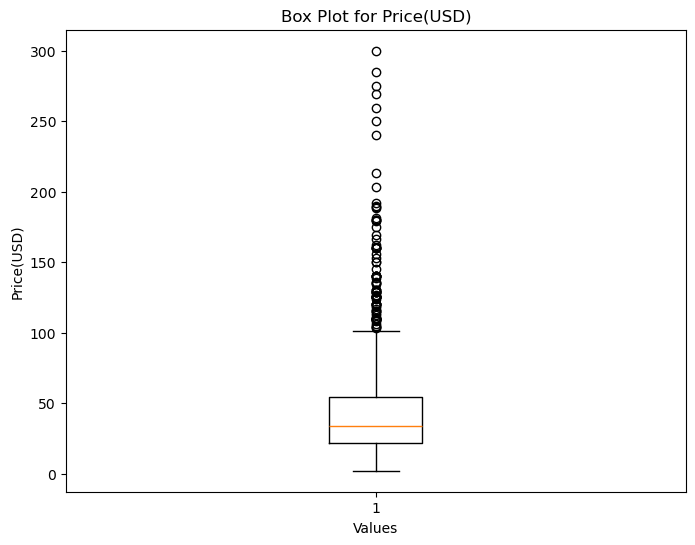

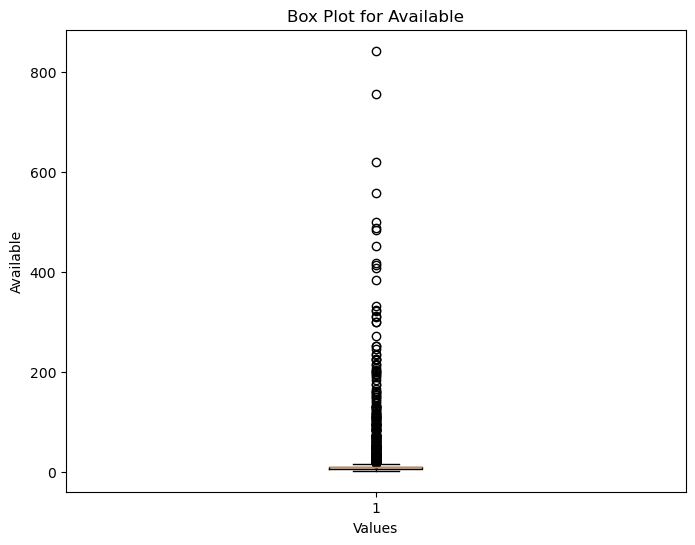

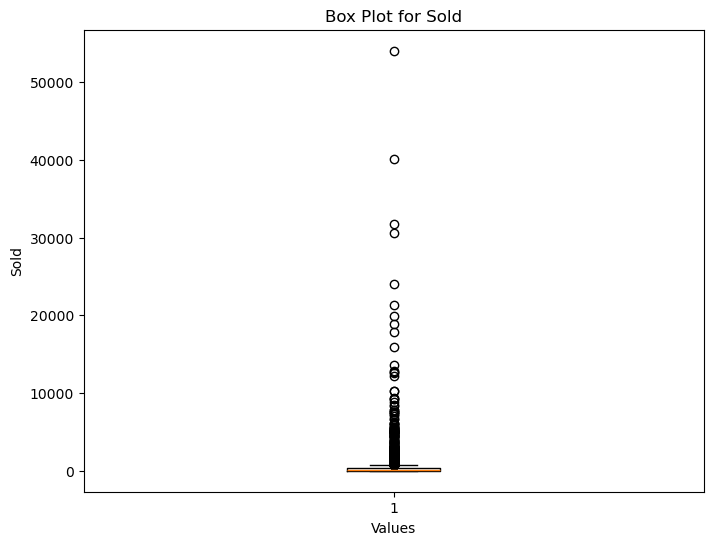

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# check for outliers

# Select numerical columns for analysis 
numerical_columns = perfume_analysis_db.select_dtypes(include=[np.number])

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(perfume_analysis_db[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.show()

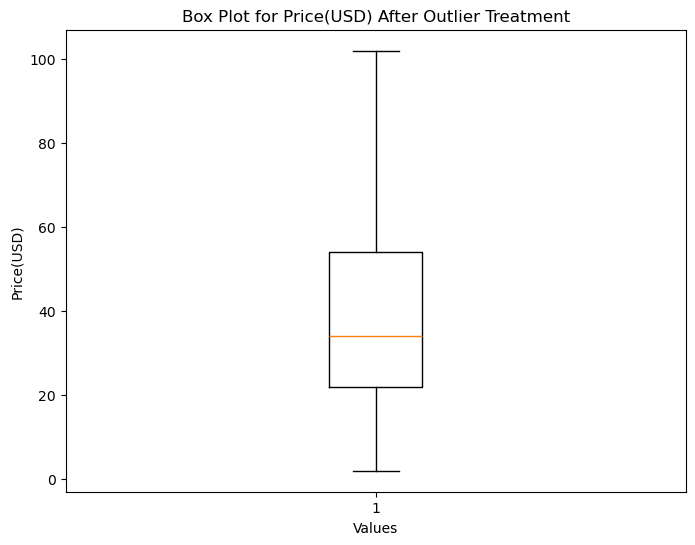

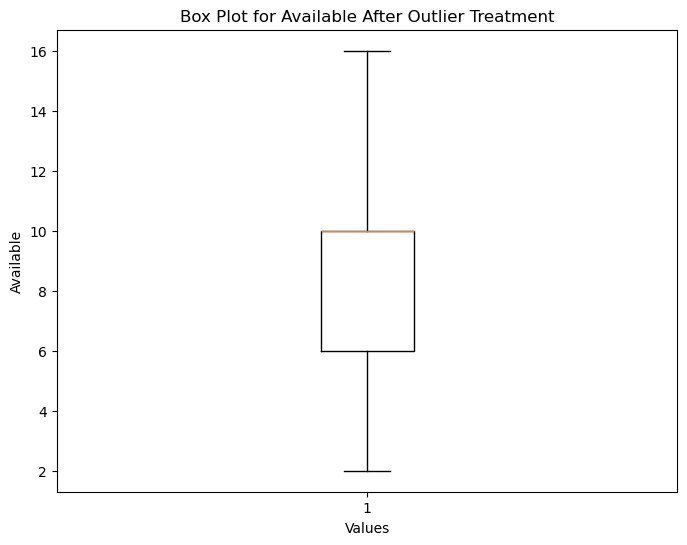

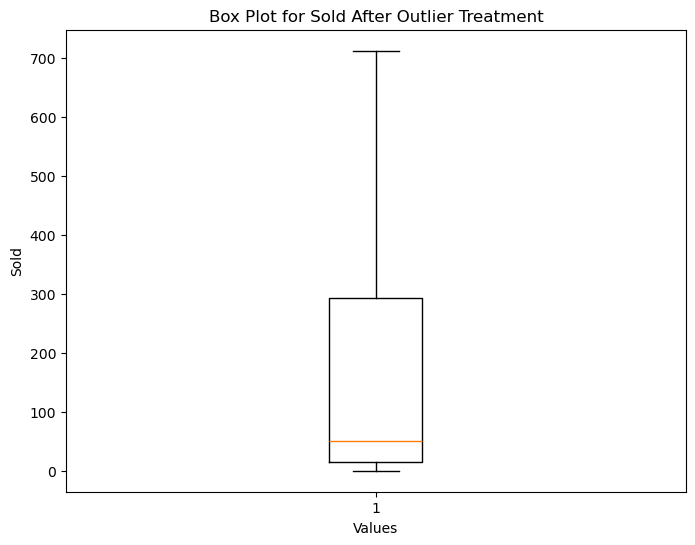

In [51]:
# treat outliers
numerical_columns = perfume_analysis_db.select_dtypes(include=[np.number])

# Function to identify and treat outliers
def treat_outliers(perfume_analysis_db, col):
    q1 = perfume_analysis_db[col].quantile(0.25)
    q3 = perfume_analysis_db[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Identify outliers based on IQR
    outliers = perfume_analysis_db[(perfume_analysis_db[col] > upper_bound) | (perfume_analysis_db[col] < lower_bound)]

 
    # Winsorization (capping to bounds)
    perfume_analysis_db.loc[outliers.index, col] = np.clip(outliers[col], lower_bound, upper_bound)

    return perfume_analysis_db

# Apply outlier treatment to each numerical column
for col in numerical_columns:
    perfume_analysis_db = treat_outliers(perfume_analysis_db, col)  

# Create box plots after outlier treatment
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(perfume_analysis_db[col])
    plt.title(f"Box Plot for {col} After Outlier Treatment")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.show()

In [52]:
# Ensure sold is of integer data type

perfume_analysis_db['Sold'] = perfume_analysis_db['Sold'].astype(int)

In [53]:
perfume_analysis_db.dtypes

Brand                                               object
Title                                               object
Type                                                object
Price(USD)                                         float64
Available                                            int64
Sold                                                 int64
Item_Location                                       object
Gender                                              object
Last_Updated_Date                           datetime64[ns]
Last_Updated_Time(Pacific_Daylight_Time)    datetime64[ns]
dtype: object

In [54]:
perfume_analysis_db.head()

Brand                                              Title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              Type  Price(USD)  Available  Sold  \
0    Eau de Parfum     84.9900         10   116   
1    Eau de Parfum    102.0275          8    48   
2  Eau de Toilette    100.0000         10    27   
3  Eau de Toilette     44.9900          2   159   
4       Fragrances     16.9100         16   156   

                            Item_Location Gender Last_Updated_Date  \
0     Allen Park, Michigan, United States   male        2024-05-24   
1                Atlanta, Georgia, Canada   male        2024-05-23   
2       Dearborn, Michigan, United States   male        2024-05-22   
3  Reinholds, Pennsylvania, United States   male        2024-05-24   
4       Brooklyn, New York, United States   male        2024-05-24   

  Last_Updated_Time(Pacific_Daylight_Time)  
0                      1900-01-01 10:03:04  
1                      1900-01-01 23:07:49  
2                      1900-01-01 21:55:43  
3                      1900-01-01 03:30:43  
4                      1900-01-01 07:56:25

# Step 2: Exploratory Data Analysis (EDA)

In [55]:
perfume_analysis_db.dtypes

Brand                                               object
Title                                               object
Type                                                object
Price(USD)                                         float64
Available                                            int64
Sold                                                 int64
Item_Location                                       object
Gender                                              object
Last_Updated_Date                           datetime64[ns]
Last_Updated_Time(Pacific_Daylight_Time)    datetime64[ns]
dtype: object

In [56]:
perfume_analysis_db_sql = perfume_analysis_db.copy()

In [57]:
# Convert datetime columns to strings
perfume_analysis_db_sql['Last_Updated_Time(Pacific_Daylight_Time)'] = perfume_analysis_db_sql['Last_Updated_Time(Pacific_Daylight_Time)'].astype(str)
perfume_analysis_db_sql['Last_Updated_Date'] = perfume_analysis_db_sql['Last_Updated_Date'].astype(str)

In [58]:
perfume_analysis_db_sql.dtypes

Brand                                        object
Title                                        object
Type                                         object
Price(USD)                                  float64
Available                                     int64
Sold                                          int64
Item_Location                                object
Gender                                       object
Last_Updated_Date                            object
Last_Updated_Time(Pacific_Daylight_Time)     object
dtype: object

In [59]:
perfume_analysis_db_sql.head()

Brand                                              Title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              Type  Price(USD)  Available  Sold  \
0    Eau de Parfum     84.9900         10   116   
1    Eau de Parfum    102.0275          8    48   
2  Eau de Toilette    100.0000         10    27   
3  Eau de Toilette     44.9900          2   159   
4       Fragrances     16.9100         16   156   

                            Item_Location Gender    Last_Updated_Date  \
0     Allen Park, Michigan, United States   male  2024-05-24 00:00:00   
1                Atlanta, Georgia, Canada   male  2024-05-23 00:00:00   
2       Dearborn, Michigan, United States   male  2024-05-22 00:00:00   
3  Reinholds, Pennsylvania, United States   male  2024-05-24 00:00:00   
4       Brooklyn, New York, United States   male  2024-05-24 00:00:00   

  Last_Updated_Time(Pacific_Daylight_Time)  
0                      1900-01-01 10:03:04  
1                      1900-01-01 23:07:49  
2                      1900-01-01 21:55:43  
3                      1900-01-01 03:30:43  
4                      1900-01-01 07:56:25

In [60]:
# Convert 'Last_Updated_Date' to string and then split by space to remove the time part
perfume_analysis_db_sql['Last_Updated_Date'] = perfume_analysis_db_sql['Last_Updated_Date'].astype(str).str.split(' ').str[0]

In [61]:
# Assuming perfume_analysis_db is a DataFrame that has been defined earlier

# Extract date and time components from the string column
perfume_analysis_db_sql['Date_Only'] = perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'].astype(str).str[:10]
perfume_analysis_db_sql['Time_Only'] = perfume_analysis_db['Last_Updated_Time(Pacific_Daylight_Time)'].astype(str).str[11:]

# Display the DataFrame with the extracted date and time components
print(perfume_analysis_db_sql[['Last_Updated_Time(Pacific_Daylight_Time)', 'Date_Only', 'Time_Only']])

     Last_Updated_Time(Pacific_Daylight_Time)   Date_Only Time_Only
0                         1900-01-01 10:03:04  1900-01-01  10:03:04
1                         1900-01-01 23:07:49  1900-01-01  23:07:49
2                         1900-01-01 21:55:43  1900-01-01  21:55:43
3                         1900-01-01 03:30:43  1900-01-01  03:30:43
4                         1900-01-01 07:56:25  1900-01-01  07:56:25
...                                       ...         ...       ...
1995                      1900-01-01 22:35:29  1900-01-01  22:35:29
1996                      1900-01-01 08:03:11  1900-01-01  08:03:11
1997                      1900-01-01 23:16:41  1900-01-01  23:16:41
1998                      1900-01-01 22:19:34  1900-01-01  22:19:34
1999                      1900-01-01 05:44:45  1900-01-01  05:44:45

[1999 rows x 3 columns]


In [62]:
# Drop the 'Date_Only' and 'Last_Updated_Time(Pacific_Daylight_Time)'  columns
perfume_analysis_db_sql.drop(columns=['Date_Only'], inplace=True)
perfume_analysis_db_sql.drop(columns=['Last_Updated_Time(Pacific_Daylight_Time)'], inplace=True)

In [63]:
perfume_analysis_db_sql.head()

Brand                                              Title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              Type  Price(USD)  Available  Sold  \
0    Eau de Parfum     84.9900         10   116   
1    Eau de Parfum    102.0275          8    48   
2  Eau de Toilette    100.0000         10    27   
3  Eau de Toilette     44.9900          2   159   
4       Fragrances     16.9100         16   156   

                            Item_Location Gender Last_Updated_Date Time_Only  
0     Allen Park, Michigan, United States   male        2024-05-24  10:03:04  
1                Atlanta, Georgia, Canada   male        2024-05-23  23:07:49  
2       Dearborn, Michigan, United States   male        2024-05-22  21:55:43  
3  Reinholds, Pennsylvania, United States   male        2024-05-24  03:30:43  
4       Brooklyn, New York, United States   male        2024-05-24  07:56:25

In [64]:
# Rename the 'Time_Only' column to 'Last_Updated_Time(Pacific_Daylight_Time)'
perfume_analysis_db_sql.rename(columns={'Time_Only': 'Last_Updated_Time(Pacific_Daylight_Time)'}, inplace=True)

In [65]:
perfume_analysis_db_sql.head()

Brand                                              Title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              Type  Price(USD)  Available  Sold  \
0    Eau de Parfum     84.9900         10   116   
1    Eau de Parfum    102.0275          8    48   
2  Eau de Toilette    100.0000         10    27   
3  Eau de Toilette     44.9900          2   159   
4       Fragrances     16.9100         16   156   

                            Item_Location Gender Last_Updated_Date  \
0     Allen Park, Michigan, United States   male        2024-05-24   
1                Atlanta, Georgia, Canada   male        2024-05-23   
2       Dearborn, Michigan, United States   male        2024-05-22   
3  Reinholds, Pennsylvania, United States   male        2024-05-24   
4       Brooklyn, New York, United States   male        2024-05-24   

  Last_Updated_Time(Pacific_Daylight_Time)  
0                                 10:03:04  
1                                 23:07:49  
2                                 21:55:43  
3                                 03:30:43  
4                                 07:56:25

In [66]:
perfume_analysis_db_sql.dtypes

Brand                                        object
Title                                        object
Type                                         object
Price(USD)                                  float64
Available                                     int64
Sold                                          int64
Item_Location                                object
Gender                                       object
Last_Updated_Date                            object
Last_Updated_Time(Pacific_Daylight_Time)     object
dtype: object

In [67]:
import sqlite3

# Step 1: Create an in-memory SQLite database
conn = sqlite3.connect('perfume_analysis.db')
cursor = conn.cursor()

# Step 2: Save the DataFrame to the SQL database
perfume_analysis_db_sql.to_sql('perfume_analysis_db_sql', con=conn, index=False, if_exists='replace')

# Step 3: Query data into a Pandas DataFrame
queried_df = pd.read_sql_query('SELECT * FROM perfume_analysis_db_sql', conn)

# Print the queried DataFrame
queried_df.head()

# Close the connection
#conn.close()

Brand                                              Title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              Type  Price(USD)  Available  Sold  \
0    Eau de Parfum     84.9900         10   116   
1    Eau de Parfum    102.0275          8    48   
2  Eau de Toilette    100.0000         10    27   
3  Eau de Toilette     44.9900          2   159   
4       Fragrances     16.9100         16   156   

                            Item_Location Gender Last_Updated_Date  \
0     Allen Park, Michigan, United States   male        2024-05-24   
1                Atlanta, Georgia, Canada   male        2024-05-23   
2       Dearborn, Michigan, United States   male        2024-05-22   
3  Reinholds, Pennsylvania, United States   male        2024-05-24   
4       Brooklyn, New York, United States   male        2024-05-24   

  Last_Updated_Time(Pacific_Daylight_Time)  
0                                 10:03:04  
1                                 23:07:49  
2                                 21:55:43  
3                                 03:30:43  
4                                 07:56:25

In [68]:
#import sqlite3
#import pandas as pd

# Step 1: Create an SQLite database connection
#conn = sqlite3.connect('perfume_analysis.db')

# Step 2: Query data from the SQL database into a Pandas DataFrame
#queried_df = pd.read_sql_query('SELECT * FROM perfume_analysis_db_sql', conn)

# Apply CSS styles to make the DataFrame look like an SQL table
#styled_df = queried_df.style.set_table_styles([
    #{'selector': 'table', 'props': [('border', '1px solid black'), ('border-collapse', 'collapse')]},
    #{'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', 'lightgrey'), ('padding', '5px')]},
    #{'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '5px')]},
#])

# Display the styled DataFrame
#display(styled_df)

# Close the connection
#conn.close()

In [69]:
# Connect to the SQLite database
#conn = sqlite3.connect('perfume_analysis.db')

# Define the SQL query to update the 'Last_Updated_Time(Pacific_Daylight_Time)' column
#query = """
#UPDATE perfume_analysis_db_sql
#SET "Last_Updated_Time(Pacific_Daylight_Time)" = SUBSTR("Last_Updated_Time(Pacific_Daylight_Time)", 1, 8)
#"""

# Execute the SQL query
#conn.execute(query)

# Commit the changes
#conn.commit()

# Query data into a Pandas DataFrame
#queried_df = pd.read_sql_query('SELECT * FROM perfume_analysis_db_sql', conn)

# Print the queried DataFrame
#queried_df.head()

# Close the connection
#conn.close()

In [70]:
#import sqlite3
#import pandas as pd

# Connect to the SQLite database
#conn = sqlite3.connect('perfume_analysis.db')

# Define the SQL query
query = """
SELECT * FROM perfume_analysis_db_sql WHERE Brand = 'Dior'
"""

# Query data into a Pandas DataFrame
queried_df = pd.read_sql_query(query, conn)

# Print the queried DataFrame
queried_df.head()

# Close the connection
#conn.close()

Brand                                              Title             Type  \
0  Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...    Eau de Parfum   
1  Dior  Dior Sauvage Eau de Toilette 3.4 Oz 100ml Bran...  Eau de Toilette   
2  Dior  Sauvage Dior Eau De Parfum MINATURE 10ml / 0.3...    Eau de Parfum   
3  Dior  Dior Sauvage EDP Men's Fragrance 3.4 Oz New Se...    Eau de Parfum   
4  Dior  Dior SAUVAGE by Christian Dior EDT Men 100 ml ...  Eau de Toilette   

   Price(USD)  Available  Sold                          Item_Location Gender  \
0       84.99         10   116    Allen Park, Michigan, United States   male   
1       83.95          4    22      Elmhurst, New York, United States   male   
2       25.99          6   712  Cranston, Rhode Island, United States   male   
3       84.99          5    73       Detroit, Michigan, United States   male   
4       84.99          9    16        Warren, Michigan, United States   male   

  Last_Updated_Date Last_Updated_Time(Pacific_Daylight_Time)  
0        2024-05-24                                 10:03:04  
1        2024-05-22                                 14:31:55  
2        2024-05-24                                 04:03:31  
3        2024-05-22                                 09:32:15  
4        2024-05-24                                 05:54:57

# Analysis

#### Market Trends and Consumer Preferences

In [71]:
# Define the SQL query
query = """
SELECT "Price(USD)" FROM perfume_analysis_db_sql
"""

# Query data into a Pandas DataFrame
queried_df = pd.read_sql_query(query, conn)

# Print the queried DataFrame
queried_df

Price(USD)
0        84.9900
1       102.0275
2       100.0000
3        44.9900
4        16.9100
...          ...
1994     13.8900
1995     57.8500
1996     30.9600
1997     53.9900
1998     14.9900

[1999 rows x 1 columns]

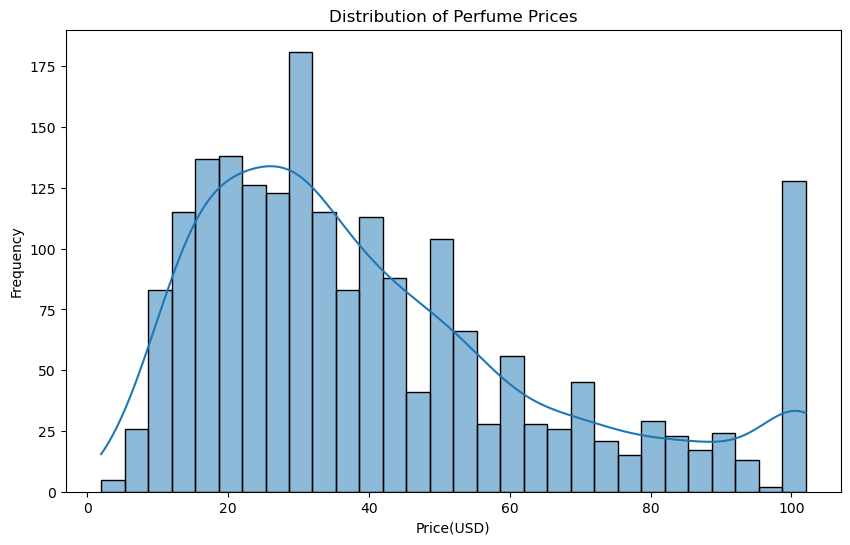

In [72]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(perfume_analysis_db_sql['Price(USD)'], bins=30, kde=True)
plt.title('Distribution of Perfume Prices')
plt.xlabel('Price(USD)')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Define the SQL query to calculate the popularity of brands by sales
query = """
SELECT Brand, SUM(Sold) AS TotalSales
FROM perfume_analysis_db_sql
GROUP BY Brand
ORDER BY TotalSales DESC
LIMIT 15
"""

# Execute the SQL query and fetch the results into a Pandas DataFrame
brand_sales = pd.read_sql_query(query, conn)


# Display the result
brand_sales

Brand  TotalSales
0              Versace       17411
1         Calvin Klein       14272
2                Armaf       12778
3       Giorgio Armani       10444
4         Ralph Lauren       10106
5             Burberry        8933
6        Dolce&Gabbana        8876
7      Dolce & Gabbana        8624
8         Paco Rabanne        7271
9   Yves Saint Laurent        6775
10    Carolina Herrera        6764
11       Liz Claiborne        6220
12       Juicy Couture        6075
13               Coach        5866
14          Jimmy Choo        5840

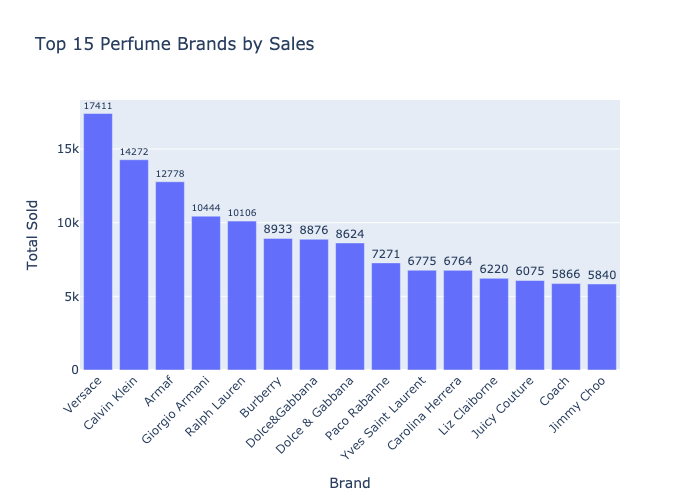

In [74]:
import plotly.graph_objects as go

# Popularity of brands by sales
top_brands = perfume_analysis_db_sql.groupby('Brand')['Sold'].sum().nlargest(15).index
brand_sales = perfume_analysis_db_sql.groupby('Brand')['Sold'].sum().loc[top_brands]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=brand_sales.index,
    y=brand_sales.values,
    text=brand_sales.values,
    textposition='outside'
))

fig.update_layout(
    title='Top 15 Perfume Brands by Sales',
    xaxis_title='Brand',
    yaxis_title='Total Sold',
    xaxis_tickangle=-45
)

fig.show("png")

In [75]:
# Define the SQL query to calculate the popularity of brands by sales
query = """
SELECT Type, SUM(Available) AS Availability
FROM perfume_analysis_db_sql
GROUP BY Type
ORDER BY Availability DESC
LIMIT 15
"""

# Execute the SQL query and fetch the results into a Pandas DataFrame
availability = pd.read_sql_query(query, conn)


# Display the result
availability

Type  Availability
0            Eau de Parfum          7768
1          Eau de Toilette          6332
2                  Perfume           959
3           Eau de Cologne           789
4           Eau de Perfume           514
5            Eau De Parfum           301
6               Fragrances           196
7          Eau De Toilette           145
8                   Parfum           143
9                Gift Sets            85
10          Fragrance Mist            76
11                   Spray            62
12                 Unknown            57
13  Eau de Toilette, Spray            51
14              Body Spray            46

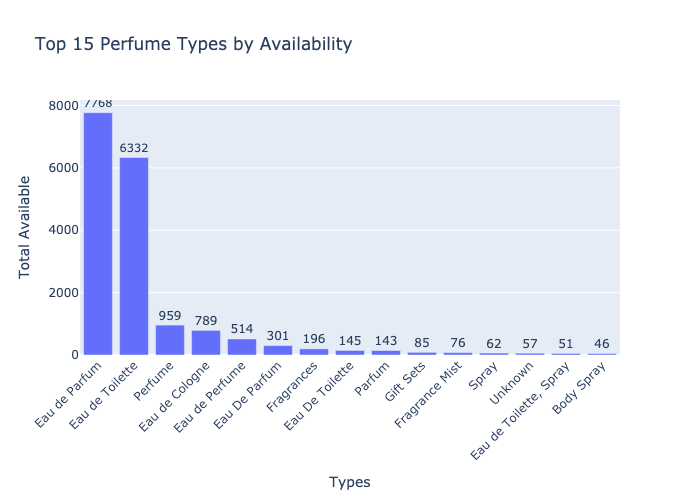

In [76]:
import plotly.graph_objects as go

# Popularity of brands by sales
top_brands = perfume_analysis_db_sql.groupby('Type')['Available'].sum().nlargest(15).index
brand_sales = perfume_analysis_db_sql.groupby('Type')['Available'].sum().loc[top_brands]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=brand_sales.index,
    y=brand_sales.values,
    text=brand_sales.values,
    textposition='outside'
))

fig.update_layout(
    title='Top 15 Perfume Types by Availability',
    xaxis_title='Types',
    yaxis_title='Total Available',
    xaxis_tickangle=-45
)

fig.show("png")

# Step 3: Sales Prediction Modeling

### Preparing Data for Modeling

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # Optional, for encoding categorical features

# Feature selection for the sales prediction model
all_features = ['Price(USD)', 'Available', 'Type', 'Brand']
df_model = pd.get_dummies(perfume_analysis_db_sql[all_features])

# Target variable (assuming "Sold" is a count)
target = perfume_analysis_db_sql['Sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 58078.7603681446


Mean Absolute Error: 161.81966505872577


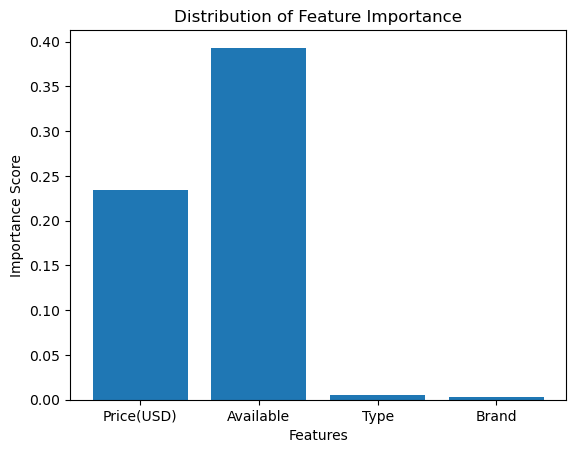

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt  # Optional, for plotting the distribution of importance scores (if desired)
from sklearn.preprocessing import LabelEncoder  # Optional, for encoding categorical features
import matplotlib.pyplot as plt  # Optional, for plotting the distribution of importance scores (if desired)
from sklearn.feature_selection import SelectKBest, f_regression  # Import both SelectKBest and f_regression


# Feature selection for the sales prediction model
all_features = ['Price(USD)', 'Available', 'Type', 'Brand']
df_model = pd.get_dummies(perfume_analysis_db_sql[all_features])

# Target variable
target = perfume_analysis_db_sql['Sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.3, random_state=42)

# Feature selection with k best features (adjust k as needed)
k = 100
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Shorten features list if desired (based on number of selected features, k)
if len(all_features) > k:
    features_to_sort = all_features
    for i in range(k, len(features_to_sort)):
        features_to_sort[i] = "Not Selected"
else:
    features_to_sort = all_features

# Train the model with selected features
model = GradientBoostingRegressor(n_estimators=450, random_state=42)
model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model (using MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Extract feature importance scores
importance = model.feature_importances_

# Filter importance scores for selected features
selected_importance = [importance[i] for i in range(len(features_to_sort)) if features_to_sort[i] != "Not Selected"]

# Plot the bar chart with filtered importance scores
plt.bar(features_to_sort, selected_importance)

plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Distribution of Feature Importance')
plt.show()

# Step 4: Customer Insights Analysis

#### Examining Sold Quantities and Item Locations

In [79]:
# Define the SQL query to fetch sold quantities data
query = "SELECT Sold FROM perfume_analysis_db_sql LIMIT 20"

# Execute the SQL query and fetch the sold quantities data
cursor = conn.cursor()
cursor.execute(query)
sold_quantities = cursor.fetchall()

# Extract sold quantities from the fetched data
sold_quantities = [row[0] for row in sold_quantities]

# Display result
sold_quantities

[116,
 48,
 27,
 159,
 156,
 79,
 39,
 6,
 17,
 68,
 615,
 458,
 712,
 63,
 136,
 20,
 44,
 384,
 236,
 22]

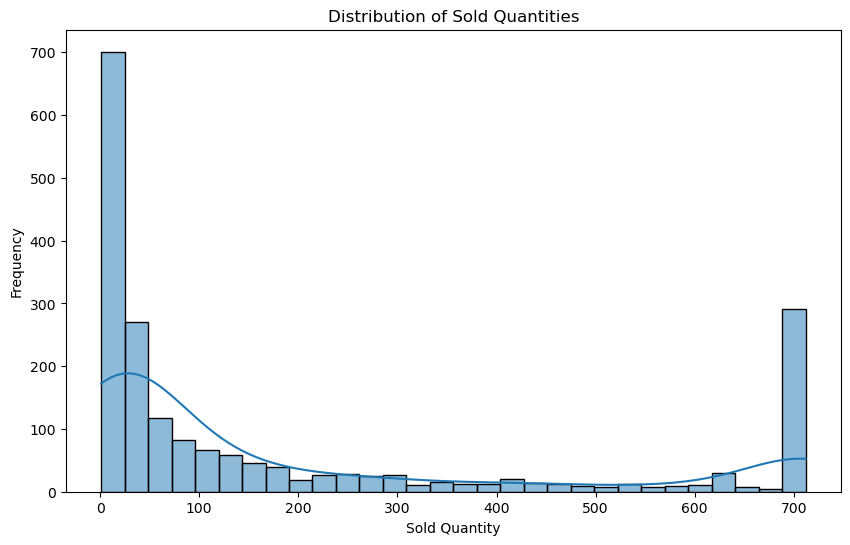

In [80]:
# Analyze the distribution of sold quantities
plt.figure(figsize=(10, 6))
sns.histplot(perfume_analysis_db_sql['Sold'], bins=30, kde=True)
plt.title('Distribution of Sold Quantities')
plt.xlabel('Sold Quantity')
plt.ylabel('Frequency')
plt.show()

In [81]:
# Define the SQL query to fetch item locations and sold quantities
query = """
SELECT Item_Location, SUM(Sold) as Total_Sold
FROM perfume_analysis_db_sql
GROUP BY Item_Location
ORDER BY Total_Sold DESC
LIMIT 10
"""

# Execute the SQL query and fetch the data into a DataFrame
top_locations_df = pd.read_sql_query(query, conn)

# Print the fetched data
print("Top Locations by Sold Quantities:")
top_locations_df

Top Locations by Sold Quantities:


Item_Location  Total_Sold
0           Dallas, Texas, United States      135770
1  Hackensack, New Jersey, United States       98893
2      Edison, New Jersey, United States       12365
3             Katy, Texas, United States       10594
4          Miami, Florida, United States        7357
5          Houston, Texas, United States        6973
6       Detroit, Michigan, United States        6435
7      Brooklyn, New York, United States        6247
8         Pearland, Texas, United States        4663
9        Warren, Michigan, United States        3469

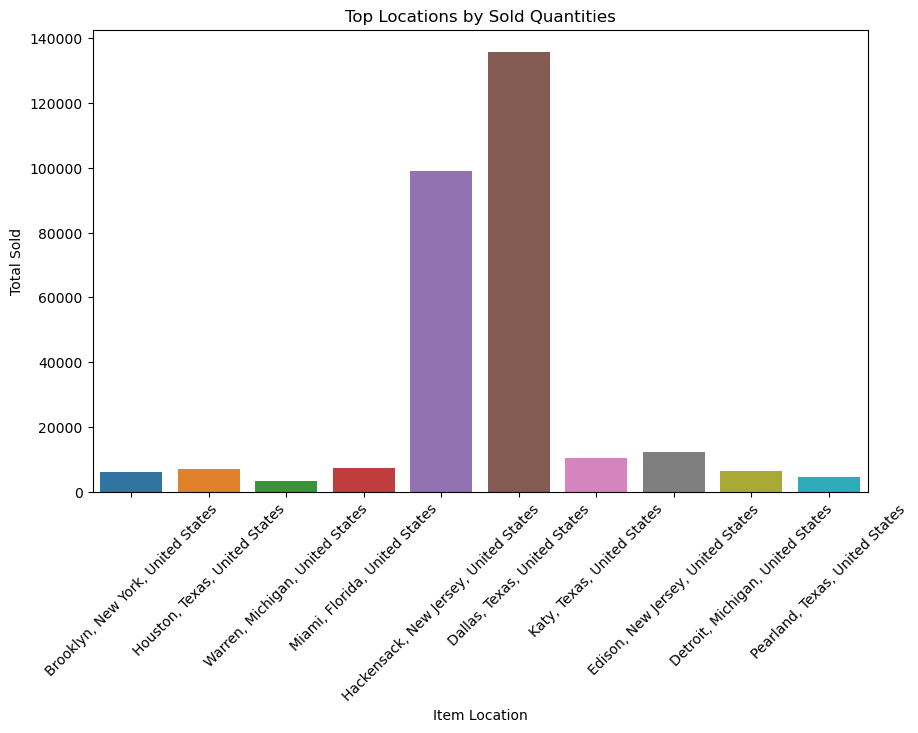

In [82]:
# Top locations by sold quantities
plt.figure(figsize=(10, 6))
top_locations = perfume_analysis_db_sql.groupby('Item_Location')['Sold'].sum().nlargest(10).index
sns.barplot(data=perfume_analysis_db_sql[perfume_analysis_db_sql['Item_Location'].isin(top_locations)], x='Item_Location', y='Sold', estimator=sum, ci=None)
plt.title('Top Locations by Sold Quantities')
plt.xlabel('Item Location')
plt.ylabel('Total Sold')
plt.xticks(rotation=45)
plt.show()

In [83]:
# Query data from the database
query = """
SELECT Gender, [Price(USD)]
FROM perfume_analysis_db_sql
GROUP BY Gender
"""
perfume_df = pd.read_sql_query(query, conn)

# Print the fetched data
print("Data fetched from the database:")
perfume_df

Data fetched from the database:


Gender  Price(USD)
0  female       43.99
1    male       84.99

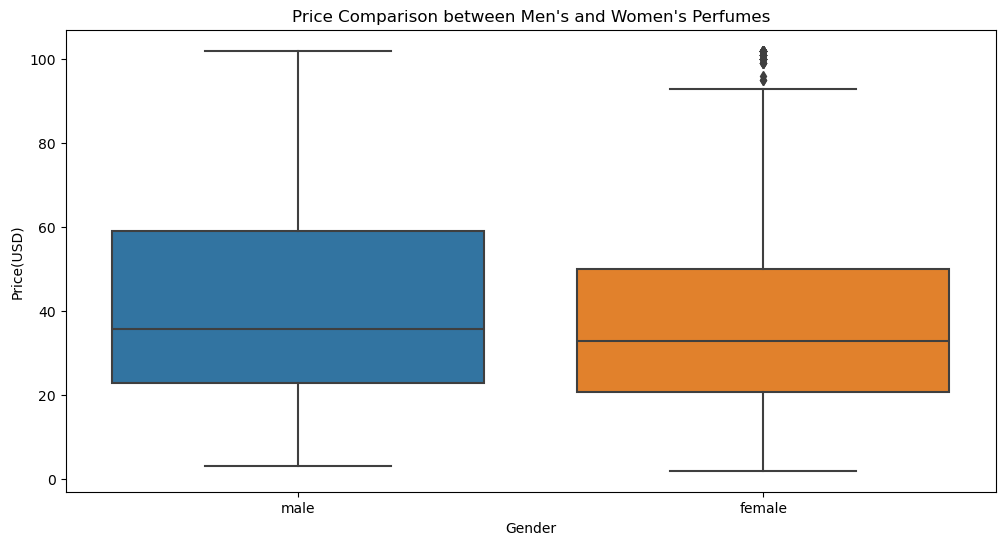

In [84]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(x='Gender', y='Price(USD)', data=perfume_analysis_db_sql)
plt.xlabel('Gender')
plt.ylabel('Price(USD)')
plt.title('Price Comparison between Men\'s and Women\'s Perfumes')
plt.show()

In [85]:
# Step 2: Query data from the database and calculate averages
query = """
SELECT Gender, 
       AVG(Available) as avg_available, 
       AVG(Sold) as avg_sold
FROM perfume_analysis_db_sql
GROUP BY Gender
"""
avg_df = pd.read_sql_query(query, conn)

# Print the results
avg_df

Gender  avg_available    avg_sold
0  female       9.672673  194.891892
1    male       9.145000  201.218000

Average Availability (Men): 9.14
Average Availability (Women): 9.67
Average Sold (Men): 201.22
Average Sold (Women): 194.89


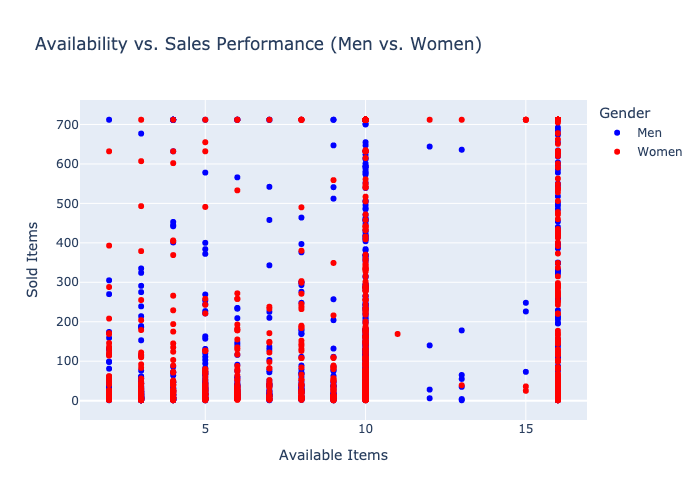

In [86]:
import pandas as pd
import plotly.graph_objects as go

# Separate data for men and women
men_data = perfume_analysis_db_sql[perfume_analysis_db_sql['Gender'] == 'male']
women_data = perfume_analysis_db_sql[perfume_analysis_db_sql['Gender'] == 'female']

# Calculate average availability and sales
men_avg_available = men_data['Available'].mean()
women_avg_available = women_data['Available'].mean()
men_avg_sold = men_data['Sold'].mean()
women_avg_sold = women_data['Sold'].mean()

# Print average values (optional)
print(f"Average Availability (Men): {men_avg_available:.2f}")
print(f"Average Availability (Women): {women_avg_available:.2f}")
print(f"Average Sold (Men): {men_avg_sold:.2f}")
print(f"Average Sold (Women): {women_avg_sold:.2f}")

# Create plotly scatter plot
fig = go.Figure()

# Add traces for men and women's data
fig.add_trace(go.Scatter(
    x=men_data['Available'],
    y=men_data['Sold'],
    mode='markers',  # Set marker mode for scatter points
    #opacity=0.5,  # Adjust marker transparency
    name='Men',
    marker=dict(color='blue')  # Set marker color
))

fig.add_trace(go.Scatter(
    x=women_data['Available'],
    y=women_data['Sold'],
    mode='markers',  # Set marker mode for scatter points
    #opacity=0.5,  # Adjust marker transparency
    name='Women',
    marker=dict(color='red')  # Set marker color
))

# Update layout for the chart
fig.update_layout(
    title='Availability vs. Sales Performance (Men vs. Women)',
    xaxis_title='Available Items',
    yaxis_title='Sold Items',
    legend_title_text='Gender'  # Customize legend title
)

# Display the chart
fig.show("png")

# Step 5: Price Optimization Analysis

#### Analyzing Price Distributions and Revenue Maximization

In [87]:
# Calculate Revenue
revenue_query = """
SELECT 
    `Price(USD)`,
    Sold,
    (`Price(USD)` * Sold) AS `Revenue(USD)`
FROM 
    perfume_analysis_db_sql
"""

# Step 2: Query the data from the SQLite database
perfume_analysis_db_sql = pd.read_sql_query(revenue_query, conn)

# Print the results
perfume_analysis_db_sql

Price(USD)  Sold  Revenue(USD)
0        84.9900   116       9858.84
1       102.0275    48       4897.32
2       100.0000    27       2700.00
3        44.9900   159       7153.41
4        16.9100   156       2637.96
...          ...   ...           ...
1994     13.8900   157       2180.73
1995     57.8500    58       3355.30
1996     30.9600     3         92.88
1997     53.9900   117       6316.83
1998     14.9900    51        764.49

[1999 rows x 3 columns]

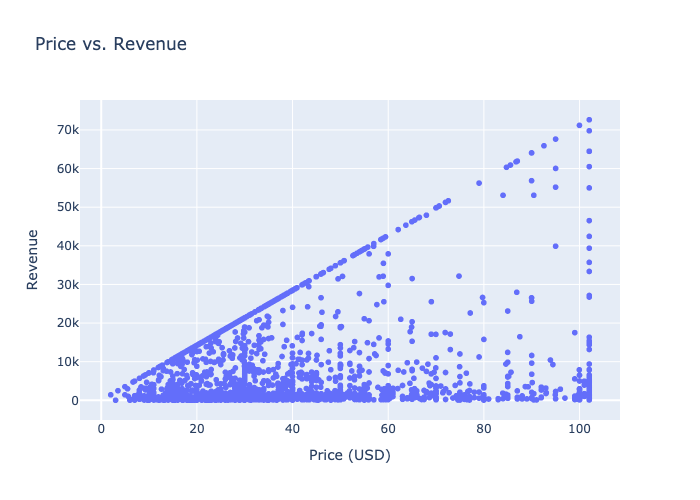

In [88]:
# Calculate Revenue
perfume_analysis_db_sql['Revenue'] = perfume_analysis_db_sql['Price(USD)'] * perfume_analysis_db_sql['Sold']

# Create the scatter plot
fig = px.scatter(perfume_analysis_db_sql, 
                 x='Price(USD)', 
                 y='Revenue', 
                 title='Price vs. Revenue',
                 labels={'Price(USD)': 'Price (USD)', 'Revenue': 'Revenue'})

# Show the plot
fig.show("png")

In [89]:
# Optimal pricing strategy (e.g., using bins)
revenue_query = """
SELECT 
    CASE 
        WHEN `Price(USD)` BETWEEN 0 AND 10 THEN '0-10'
        WHEN `Price(USD)` BETWEEN 10 AND 20 THEN '10-20' 
        WHEN `Price(USD)` BETWEEN 20 AND 30 THEN '20-30'
        WHEN `Price(USD)` BETWEEN 30 AND 40 THEN '30-40'
        WHEN `Price(USD)` BETWEEN 40 AND 50 THEN '40-50'
        WHEN `Price(USD)` BETWEEN 50 AND 60 THEN '50-60'
        WHEN `Price(USD)` BETWEEN 60 AND 70 THEN '60-70'
        WHEN `Price(USD)` BETWEEN 70 AND 80 THEN '70-80'
        WHEN `Price(USD)` BETWEEN 80 AND 90 THEN '80-90'
        WHEN `Price(USD)` BETWEEN 90 AND 100 THEN '90-100'
        ELSE 'Above 100'
    END AS Price_Bin,
    SUM(`Price(USD)` * Sold) AS Revenue
FROM 
    perfume_analysis_db_sql
GROUP BY 
    Price_Bin
ORDER BY 
    CAST(REPLACE(Price_Bin, '-', ' ') AS INTEGER)
"""

# Step 2: Query the data from the SQLite database
price_revenue = pd.read_sql_query(revenue_query, conn)

# Print the results
price_revenue

Price_Bin       Revenue
0        0-10  1.259701e+05
1   Above 100  9.730799e+05
2       10-20  1.340290e+06
3       20-30  2.891667e+06
4       30-40  2.550998e+06
5       40-50  1.714030e+06
6       50-60  1.673709e+06
7       60-70  7.849989e+05
8       70-80  6.549879e+05
9       80-90  7.288477e+05
10     90-100  5.317109e+05

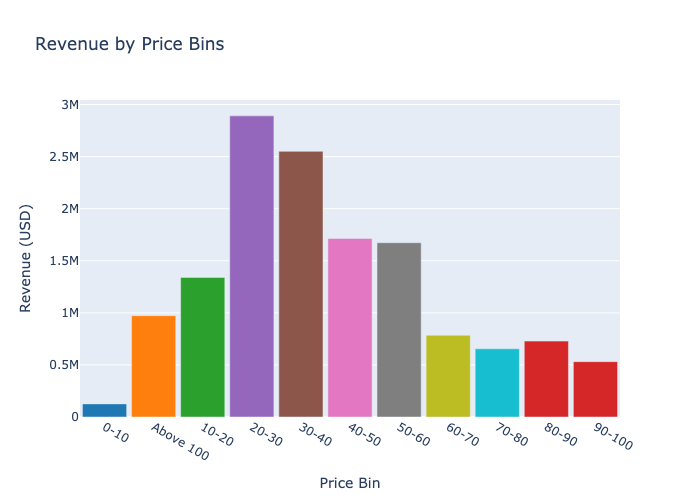

In [90]:
# Visualize the data using Plotly
import plotly.graph_objects as go

# Create the bar chart
fig = go.Figure(data=[go.Bar(
    x=price_revenue['Price_Bin'],
    y=price_revenue['Revenue'],
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#d62728', '#d62728']
)])

# Update the layout
fig.update_layout(
    title='Revenue by Price Bins',
    xaxis_title='Price Bin',
    yaxis_title='Revenue (USD)',
    bargap=0.1
)

# Show the chart
fig.show("png")

# Step 6: Geographical Distribution Analysis

#### Studying Regional Market Dynamics

In [91]:
# Geographical distribution of listings
location_query = """
SELECT 
    `Item_Location`, 
    COUNT(*) AS Listings_Count
FROM 
    perfume_analysis_db_sql
GROUP BY 
    `Item_Location`
ORDER BY 
    Listings_Count DESC
LIMIT 
    10
"""

# Step 2: Query the data from the SQLite database
top_locations = pd.read_sql_query(location_query, conn)

# Print the results
top_locations

Item_Location  Listings_Count
0           Dallas, Texas, United States             267
1  Hackensack, New Jersey, United States             190
2      Brooklyn, New York, United States             111
3          Miami, Florida, United States              73
4      Edison, New Jersey, United States              61
5          Houston, Texas, United States              47
6       Detroit, Michigan, United States              47
7      New York, New York, United States              40
8             Katy, Texas, United States              40
9        Warren, Michigan, United States              32

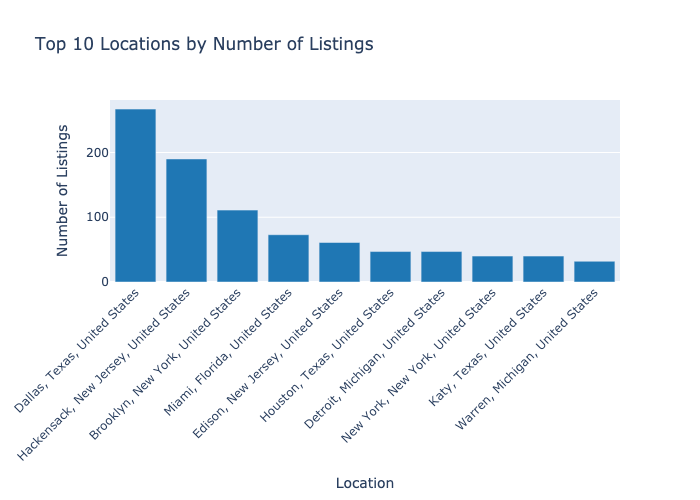

In [92]:
# Create the bar chart using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=top_locations['Item_Location'],
    y=top_locations['Listings_Count'],
    marker_color='#1f77b4'
)])

fig.update_layout(
    title='Top 10 Locations by Number of Listings',
    xaxis_title='Location',
    yaxis_title='Number of Listings',
    xaxis_tickangle=-45
)

fig.show("png")

In [93]:
# Sold quantities by region
sold_by_location_query = """
SELECT 
    `Item_Location`, 
    SUM(`Sold`) AS Total_Sold
FROM 
    perfume_analysis_db_sql
GROUP BY 
    `Item_Location`
ORDER BY 
    Total_Sold DESC
LIMIT 
    10
"""

# Step 2: Query the data from the SQLite database
sold_by_location = pd.read_sql_query(sold_by_location_query, conn)

# Print the results
sold_by_location

Item_Location  Total_Sold
0           Dallas, Texas, United States      135770
1  Hackensack, New Jersey, United States       98893
2      Edison, New Jersey, United States       12365
3             Katy, Texas, United States       10594
4          Miami, Florida, United States        7357
5          Houston, Texas, United States        6973
6       Detroit, Michigan, United States        6435
7      Brooklyn, New York, United States        6247
8         Pearland, Texas, United States        4663
9        Warren, Michigan, United States        3469

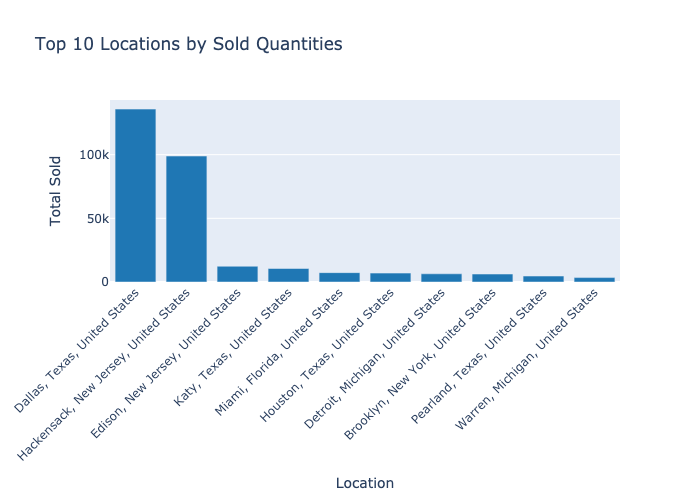

In [94]:
# Create the bar chart using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=sold_by_location['Item_Location'],
    y=sold_by_location['Total_Sold'],
    marker_color='#1f77b4'
)])

fig.update_layout(
    title='Top 10 Locations by Sold Quantities',
    xaxis_title='Location',
    yaxis_title='Total Sold',
    xaxis_tickangle=-45
)

fig.show("png")

# Build Interactive Dashboard

In [95]:
import pandas as pd
import plotly.graph_objects as go
import vizro.models as vm
from vizro.plotly.express import px
from vizro.tables import dash_data_table
from vizro.models.types import capture
from vizro import Vizro; Vizro._reset()

# Load data from the SQLite database
conn = sqlite3.connect('perfume_analysis.db')
query = "SELECT * FROM perfume_analysis_db_sql"
perfume_analysis_db_sql = pd.read_sql_query(query, conn)
conn.close()

# Calculate the revenue
perfume_analysis_db_sql['Revenue'] = perfume_analysis_db_sql['Price(USD)'] * perfume_analysis_db_sql['Sold']

# Define visualizations using @capture decorator
@capture('graph')
def price_revenue_scatter(data_frame):
    return px.scatter(data_frame, 
                      x='Price(USD)', 
                      y='Revenue', 
                      title='Price vs. Revenue',
                      labels={'Price(USD)': 'Price (USD)', 'Revenue': 'Revenue'})

@capture('graph')
def sold_distribution_histogram(data_frame):
    return px.histogram(data_frame, x='Sold', title='Distribution of Sold Quantities')

# Calculate total sold quantities by location
@capture('graph')
def sold_by_location_bar(data_frame):
    sold_by_location = data_frame.groupby('Item_Location')['Sold'].sum().nlargest(10).reset_index()
    sold_by_location.columns = ['Item_Location', 'Total_Sold']
    
    fig = go.Figure(data=[go.Bar(
        x=sold_by_location['Item_Location'],
        y=sold_by_location['Total_Sold'],
        marker_color='#1f77b4'
    )])

    fig.update_layout(
        title='Top 10 Locations by Sold Quantities',
        xaxis_title='Location',
        yaxis_title='Total Sold',
        xaxis_tickangle=-45
    )
    return fig

# Define the page layout with additional visualizations
page = vm.Page(
    components=[
        vm.Graph(figure=price_revenue_scatter(data_frame=perfume_analysis_db_sql)),
        vm.Graph(figure=sold_distribution_histogram(data_frame=perfume_analysis_db_sql)),
        vm.Graph(figure=sold_by_location_bar(data_frame=perfume_analysis_db_sql))  # Add the bar chart
    ],
    controls=[
        vm.Filter(column='Item_Location')
    ],
    title='Perfume Analysis Dashboard'
)

# Create the dashboard with the page
dashboard = vm.Dashboard(pages=[page])

# Build and run the dashboard
Vizro().build(dashboard).run()